# Eye State Recognition Using Alpha Waves

## Loading & Inspecting Dataset   

In [1]:
import dataset
import numpy as np
from mne.preprocessing import ICA
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

# define the dataset instance
eeg_dataset = dataset.AlphaWaves() 
eeg_dataset.subject_list 

C:\Users\hager\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [2]:
# get the data from subject 1
subject = eeg_dataset.subject_list[0]
raw = eeg_dataset._get_single_subject_data(subject) 
print(type(raw))
raw.get_data().shape # 16 channels + stimulation label 
# very huge data size, so we need to resample with a less sampling rate  

<class 'mne.io.array.array.RawArray'>


(17, 119808)

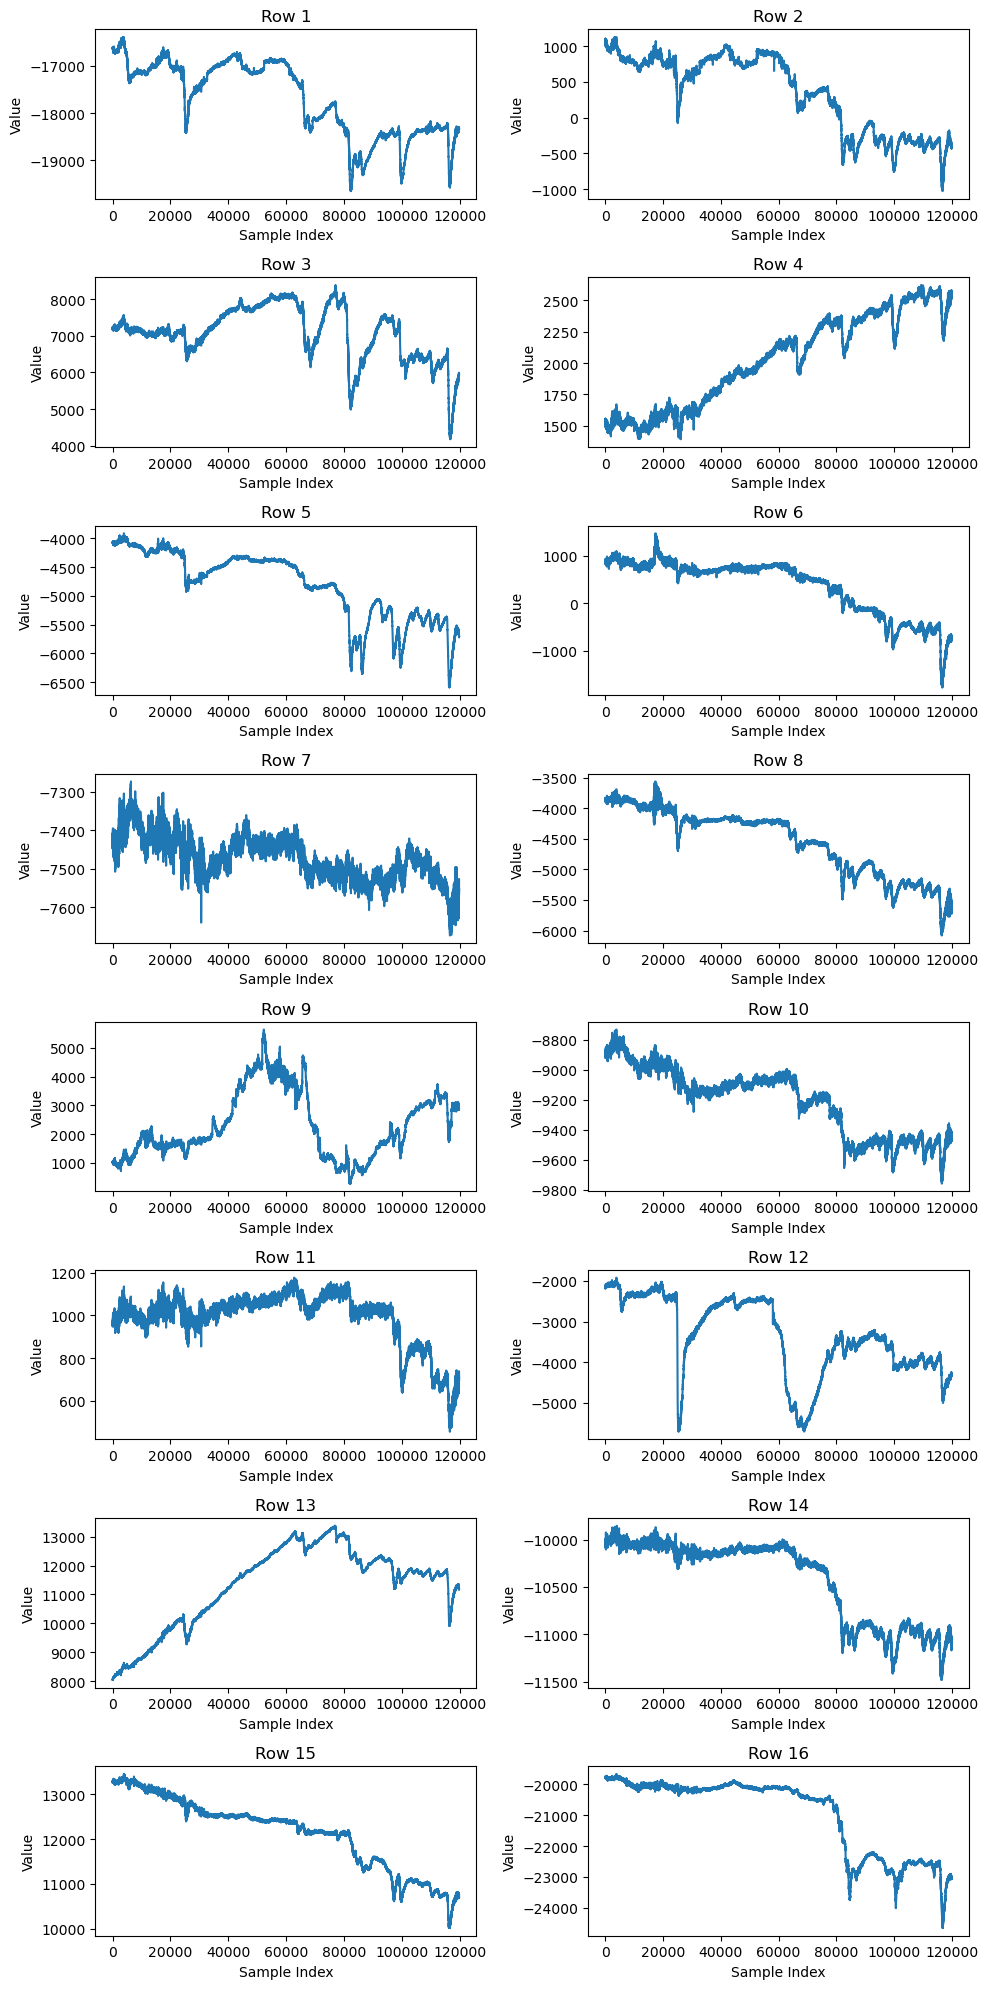

In [3]:
# raw.resample(sfreq=128, verbose=False) # the actual sfreq 512 Hz  
# print(raw.get_data().shape)  # after resampling 
data = raw.get_data()

num_rows = 8 
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 20))

for i in range(data.shape[0]-1): # plot the 16 channels 
    row = i // 2 # two per row 
    col = i % 2 # 8 per column 

    axes[row, col].plot(data[i, :])
    axes[row, col].set_title(f'Row {i + 1}')
    axes[row, col].set_xlabel('Sample Index')
    axes[row, col].set_ylabel('Value')
plt.tight_layout()

There are artifacts resulting from noisy sources during the recording process, which need to be removed!!

## Filtering Dataset Using Bandpass Filter

In [4]:
subjects_Filtered_data = list()

for i in eeg_dataset.subject_list:
    raw = eeg_dataset._get_single_subject_data(i).filter(8,13,picks ="eeg",verbose = False)
    # raw.set_eeg_reference(ref_channels='average')
    subjects_Filtered_data.append(raw)

## Visualizing Subject 1, Channel 7

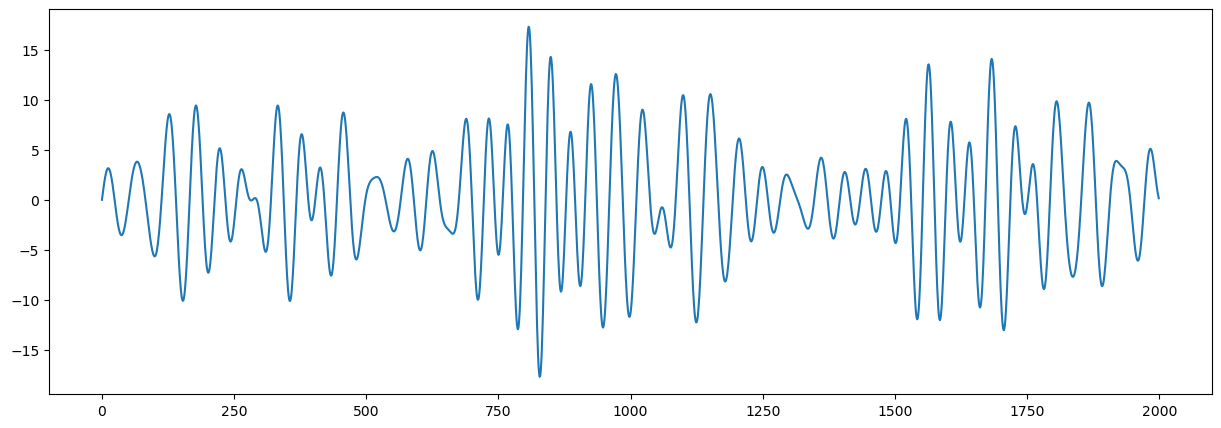

In [5]:
subject1_channel7 = subjects_Filtered_data[0].get_data()[15]
plt.figure(figsize=(15,5))
plt.plot(subject1_channel7[:2000])

Still there are some noise, so we can apply Independent Component Analysis (ICA) 

## Denoising  

In [6]:
# let's start with n_components = 16 = number of channels 
ica = ICA(n_components=16, random_state=1) # reproducibility 

Fitting ICA to data using 16 channels (please be patient, this may take a while)


Selecting by number: 16 components
Fitting ICA took 1.5s.


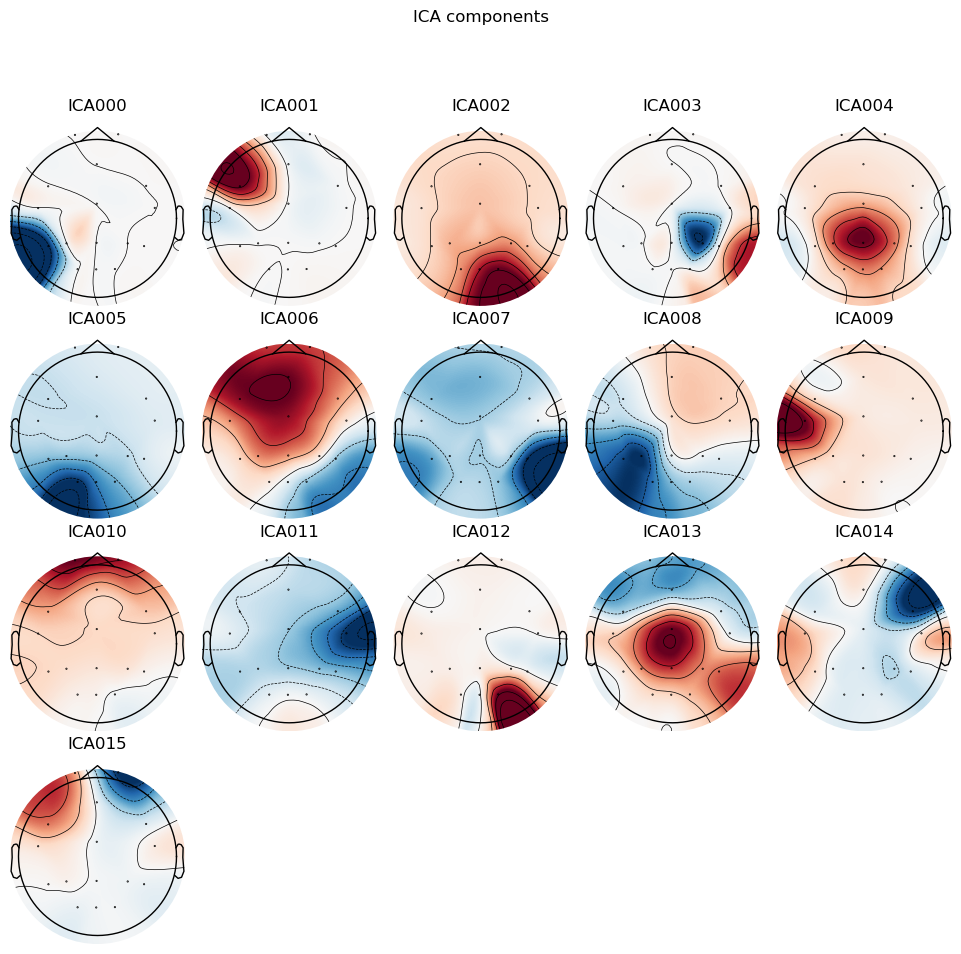

In [7]:
ica.fit(subjects_Filtered_data[0]) # for subject 1 
ica.plot_components();

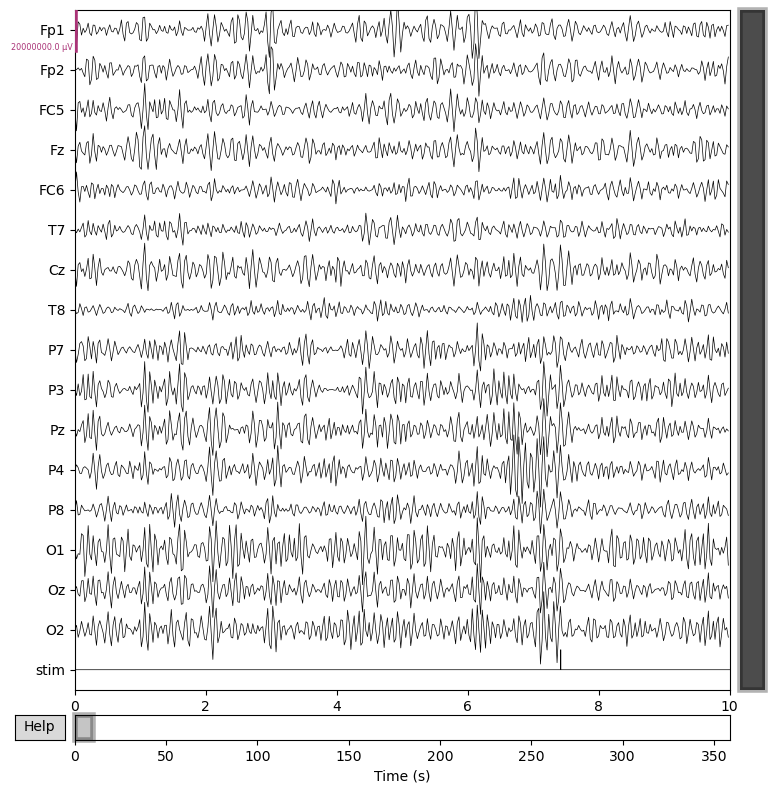

In [70]:
# eeg_picks = subjects_Filtered_data[0].pick_types(eeg = True)
scalings = {'eeg': 10}
# eeg_picks.plot(scalings = scalings);
subjects_Filtered_data[1].plot(scalings = scalings);

In [71]:
bad_index,_ = ica.find_bads_eog(subjects_Filtered_data[1].copy(), ch_name=['P7', 'P8','T7'], threshold=1.3)
# print(bad_indx) 

Using EOG channels: P7, P8, T7
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5120 samples (10.000 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5120 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5120 samples (10.000 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5120 samples (10.000 s)

... filtering ICA sources


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5120 samples (10.000 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5120 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [72]:
ica.exclude=bad_index

Applying ICA to Raw instance
    Transforming to ICA space (16 components)
    Zeroing out 8 ICA components
    Projecting back using 16 PCA components


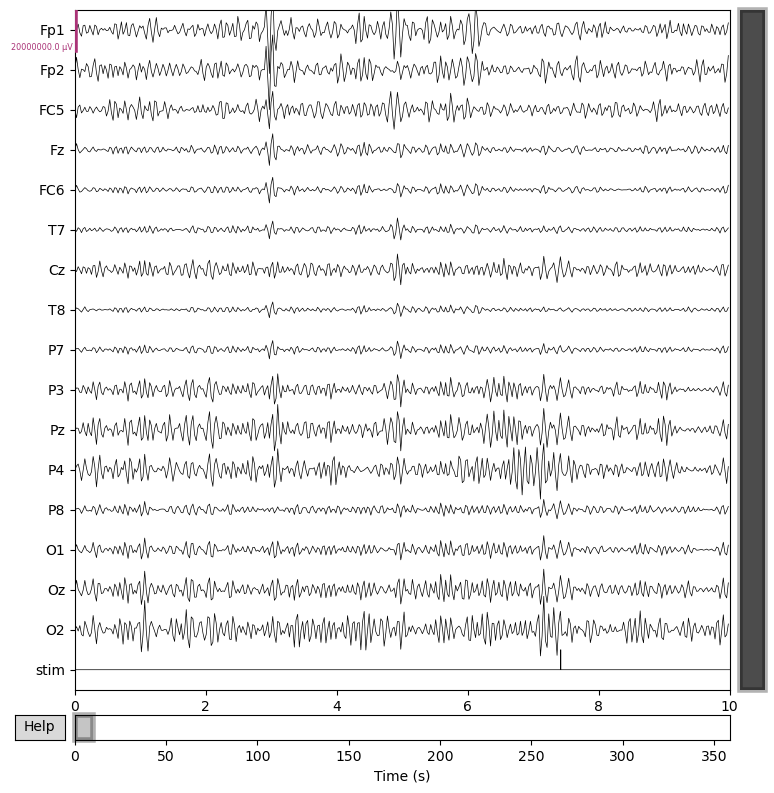

In [73]:
ica.apply(subjects_Filtered_data[1].copy(),exclude=ica.exclude).plot(scalings = scalings);